In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats 

In [2]:
#Reading Dataset

df_og = pd.read_csv('Advertising_Data.csv')

In [3]:
#Cleaning Dataset - Determining 3 sigma limits

print("Highest allowed",df_og['Product_Sold'].mean() + 3*df_og['Product_Sold'].std())
print("Lowest allowed",df_og['Product_Sold'].mean() - 3*df_og['Product_Sold'].std())

Highest allowed 12142.368187383778
Lowest allowed 1920.6784792828885


In [4]:
df_og.describe()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,517.431000,502.644933,512.444133,489.800100,465.732567,484.430633,7031.523333
std,288.114792,275.842369,285.422376,273.883915,288.314080,277.955458,1703.614951
min,1.040000,3.630000,14.860000,11.690000,0.770000,6.740000,2259.000000
25%,273.090000,277.912500,250.530000,265.612500,214.480000,267.677500,5922.500000
50%,513.970000,533.020000,528.965000,486.385000,480.355000,451.315000,7051.000000
75%,774.275000,745.005000,763.345000,695.117500,703.092500,721.065000,8278.000000
max,998.100000,995.320000,999.230000,996.160000,999.830000,987.580000,12227.000000


In [5]:
#Cleaning Dataset - Removing outliers

df = df_og[(df_og['Product_Sold'] < 12142.368187383778) & (df_og['Product_Sold'] > 1920.6784792828885)]
df_og = df_og[(df_og['Product_Sold'] < 12142.368187383778) & (df_og['Product_Sold'] > 1920.6784792828885)]

df.describe()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,516.528328,501.156355,511.200970,488.119498,464.375318,483.567993,7014.147157
std,288.172562,275.095173,285.086155,272.789201,287.835820,278.018888,1679.630843
min,1.040000,3.630000,14.860000,11.690000,0.770000,6.740000,2259.000000
25%,271.880000,277.515000,249.500000,263.035000,212.480000,265.945000,5914.000000
50%,512.380000,532.210000,528.760000,485.140000,480.160000,450.980000,7048.000000
75%,771.935000,738.835000,761.720000,692.225000,699.920000,719.255000,8262.500000
max,998.100000,995.320000,999.230000,996.160000,999.830000,987.580000,11210.000000


In [6]:
df['Total Spend'] = df['TV'] + df['Billboards'] + df['Google_Ads'] + df['Social_Media'] + df['Influencer_Marketing'] + df['Affiliate_Marketing']

df['Spend per Unit'] = df['Total Spend']/df['Product_Sold']

df['Share of TV'] = df['TV']/df['Total Spend']*100
df['Share of Billboards'] = df['Billboards']/df['Total Spend']*100
df['Share of Google_Ads'] = df['Google_Ads']/df['Total Spend']*100
df['Share of Social_Media'] = df['Social_Media']/df['Total Spend']*100
df['Share of Influencer_Marketing'] = df['Influencer_Marketing']/df['Total Spend']*100
df['Share of Affiliate_Marketing'] = df['Affiliate_Marketing']/df['Total Spend']*100

In [7]:
df = df.round(2)

df.sort_values(by=['Spend per Unit'])

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold,Total Spend,Spend per Unit,Share of TV,Share of Billboards,Share of Google_Ads,Share of Social_Media,Share of Influencer_Marketing,Share of Affiliate_Marketing
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0,2446.33,0.34,11.50,22.02,5.07,14.28,9.92,37.20
5,507.13,612.27,230.67,142.96,171.79,965.77,7627.0,2630.59,0.34,19.28,23.28,8.77,5.43,6.53,36.71
180,132.99,757.70,167.64,230.73,297.79,886.06,7282.0,2472.91,0.34,5.38,30.64,6.78,9.33,12.04,35.83
233,143.05,722.70,141.99,953.58,48.53,797.64,8297.0,2807.49,0.34,5.10,25.74,5.06,33.97,1.73,28.41
105,142.99,644.11,93.04,221.03,547.35,968.01,7430.0,2616.53,0.35,5.46,24.62,3.56,8.45,20.92,37.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,783.39,185.17,997.60,578.32,811.54,119.33,6522.0,3475.35,0.53,22.54,5.33,28.71,16.64,23.35,3.43
88,253.65,51.38,417.09,689.61,885.97,74.93,4368.0,2372.63,0.54,10.69,2.17,17.58,29.07,37.34,3.16
118,288.31,233.38,936.94,349.42,598.62,54.17,4481.0,2460.84,0.55,11.72,9.48,38.07,14.20,24.33,2.20
114,632.14,332.75,875.67,63.47,979.73,85.44,5255.0,2969.20,0.57,21.29,11.21,29.49,2.14,33.00,2.88


In [8]:
correlation_matrix = df_og.corr()

correlation_matrix

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
TV,1.000000,-0.034122,0.021263,-0.045082,0.005572,0.084854,0.371014
Billboards,-0.034122,1.000000,0.046273,0.039180,-0.013541,-0.046354,0.473569
Google_Ads,0.021263,0.046273,1.000000,0.032524,-0.065800,-0.136475,0.193945
Social_Media,-0.045082,0.039180,0.032524,1.000000,-0.051809,-0.025415,0.390634
Influencer_Marketing,0.005572,-0.013541,-0.065800,-0.051809,1.000000,-0.051723,0.128889
Affiliate_Marketing,0.084854,-0.046354,-0.136475,-0.025415,-0.051723,1.000000,0.612613
Product_Sold,0.371014,0.473569,0.193945,0.390634,0.128889,0.612613,1.000000


<Axes: >

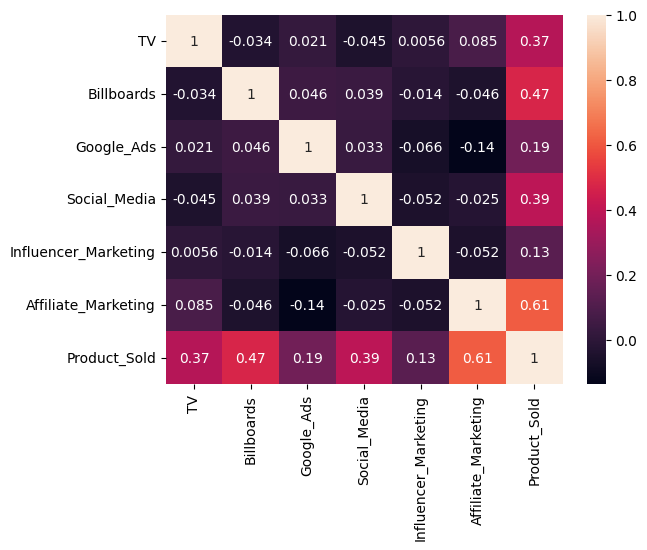

In [9]:
sn.heatmap(correlation_matrix, annot = True)

Taking the least and most correlated values into linear regression graphs:

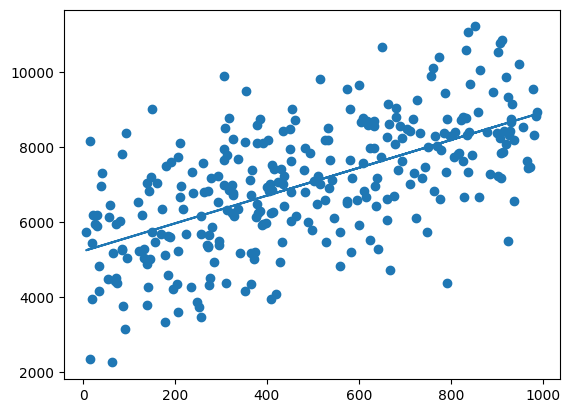

In [10]:
slope, intercept, r, p, std_err = stats.linregress(df_og['Affiliate_Marketing'],df_og['Product_Sold'])

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, df_og['Affiliate_Marketing']))

plt.scatter(df_og['Affiliate_Marketing'],df_og['Product_Sold'])
plt.plot(df_og['Affiliate_Marketing'], mymodel)
plt.show()

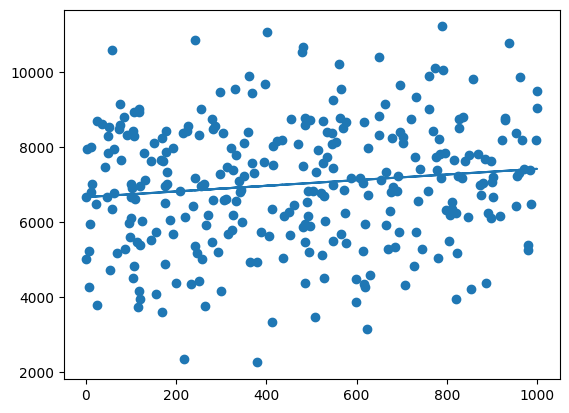

In [11]:
slope, intercept, r, p, std_err = stats.linregress(df_og['Influencer_Marketing'],df_og['Product_Sold'])

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, df_og['Influencer_Marketing']))

plt.scatter(df_og['Influencer_Marketing'],df_og['Product_Sold'])
plt.plot(df_og['Influencer_Marketing'], mymodel)
plt.show()